In [1]:
import pandas as pd
import json
import os
from IPython.display import display, Markdown
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from collections import Counter

In [ ]:
with open('results_document_compared/thresholds_IQR.json') as json_data:
    thresholds = json.load(json_data)

In [40]:
def plot_thresholds_table(json_path='./results/thresholds_tmp.csv'):

    with open(json_path) as json_data:
        thresholds = json.load(json_data)

    flattened = {}

    for text_id, categories in thresholds.items():
        for category, features in categories.items():
            for feature, value in features.items():
                index = f"{category}/{feature}"
                flattened.setdefault(index, {})[text_id] = value

    df = pd.DataFrame.from_dict(flattened, orient='index')
    df = df[['N1', 'N2', 'N3', 'N4']]  # ensure column order

    csv_path = os.path.splitext(json_path)[0] + ".csv"

    df.to_csv(csv_path, index=True)

    return df

In [41]:
plot_thresholds_table('results_document_compared/thresholds_IQR.json')

,N1,N2,N3,N4
sentence-token-level/max_size_aux_verbs,5.0000,3.5000,2.0000,2.0000
sentence-token-level/max_size_passive,0.0000,5.0000,5.0000,5.0000
sentence-token-level/max_size_named_entities,7.0000,9.5000,9.5000,7.0000
sentence-token-level/max_size_np_pp_modifiers,29.5000,16.5000,16.0000,15.6250
sentence-token-level/max_size_subordination,21.5000,31.5000,49.0000,53.2500
sentence-token-level/max_size_coordination,3.5000,6.0000,6.0000,6.0000
document-token-level/total_token_ratio_aux_verbs,0.1623,0.1130,0.1019,0.0639
document-token-level/total_token_ratio_passive,0.0000,0.0220,0.0220,0.0211
document-token-level/total_token_ratio_named_entities,0.4142,0.2401,0.1955,0.1570
document-token-level/total_token_ratio_subordination,0.5601,0.6977,0.8173,0.7142


In [43]:
plot_thresholds_table(json_path='results_document_compared/thresholds_LogReg.json')

,N1,N2,N3,N4
sentence-token-level/max_size_aux_verbs,1.300,1.656,1.760,2.0000
sentence-token-level/max_size_passive,0.599,0.793,0.985,5.0000
sentence-token-level/max_size_named_entities,3.625,3.666,3.422,7.0000
sentence-token-level/max_size_np_pp_modifiers,7.672,7.981,8.122,15.6250
sentence-token-level/max_size_subordination,12.864,17.807,22.538,53.2500
sentence-token-level/max_size_coordination,2.214,2.308,2.392,6.0000
document-token-level/total_token_ratio_aux_verbs,0.036,0.033,0.030,0.0639
document-token-level/total_token_ratio_passive,0.006,0.000,0.006,0.0211
document-token-level/total_token_ratio_named_entities,0.115,0.092,0.079,0.1570
document-token-level/total_token_ratio_subordination,0.245,0.312,0.369,0.7142


In [44]:
plot_thresholds_table(json_path='results_document_compared/thresholds_LogReg_CV_old_keys.json')

,N1,N2,N3,N4
sentence-token-level/max_size_aux_verbs,1.349,1.683,1.726,2.0000
sentence-token-level/max_size_passive,0.642,0.825,1.014,5.0000
sentence-token-level/max_size_named_entities,3.841,3.677,3.350,7.0000
sentence-token-level/max_size_np_pp_modifiers,8.174,7.994,8.100,15.6250
sentence-token-level/max_size_subordination,12.346,17.932,22.575,53.2500
sentence-token-level/max_size_coordination,2.302,2.283,2.434,6.0000
document-token-level/total_token_ratio_aux_verbs,0.036,0.033,0.029,0.0639
document-token-level/total_token_ratio_passive,0.007,0.005,0.006,0.0211
document-token-level/total_token_ratio_named_entities,0.116,0.089,0.078,0.1570
document-token-level/total_token_ratio_subordination,0.218,0.315,0.368,0.7142


In [2]:
import pandas as pd
import numpy as np
import json

with open('results_document_compared/distributions.json') as json_data:
    distributions = json.load(json_data)

stats = {}

for level, categories in distributions.items():
    for category, features in categories.items():
        for feature, values in features.items():
            index = f"{level}/{category}/{feature}"
            arr = np.array(values, dtype=float)
            stats[index] = {
                "min": arr.min(),
                "max": arr.max(),
                "mean": arr.mean(),
                "std": arr.std(),
                "median": np.median(arr),
            }

df = pd.DataFrame.from_dict(stats, orient="index")

# split index into (level, category, feature)
df["level"] = df.index.str.split("/").str[0]
df["category"] = df.index.str.split("/").str[1]
df["feature"] = df.index.str.split("/").str[2]

# sort by category, feature, then level
df = df.sort_values(["category", "feature", "level"])

# rebuild flat index in desired order
df.index = df.apply(lambda row: f"{row['level']}/{row['category']}/{row['feature']}", axis=1)

# drop helper columns
df = df.drop(columns=["level", "category", "feature"])

# round for readability
df = df.round(3)

df


,min,max,mean,std,median
N1/document-document-document-level/lexical_diversity,0.606,1.00,0.931,0.089,0.953
N2/document-document-document-level/lexical_diversity,0.800,1.00,0.975,0.025,0.982
N3/document-document-document-level/lexical_diversity,0.850,1.00,0.983,0.020,0.989
N4/document-document-document-level/lexical_diversity,0.952,1.00,0.987,0.012,0.989
N1/document-document-document-level/sentence_count,1.000,25.00,7.842,7.464,5.000
...,...,...,...,...,...
N4/token-token-token-level-low/familiarity,2.250,7.00,6.151,1.033,6.714
N1/token-token-token-level-low/lexical_frequency,0.000,38928.92,9087.704,10905.478,4000.410
N2/token-token-token-level-low/lexical_frequency,0.000,38928.92,9291.568,11204.592,4838.380
N3/token-token-token-level-low/lexical_frequency,0.000,38928.92,9784.369,12040.944,4225.140


In [46]:
with open('results_document_compared/thresholds_SP.json') as json_data:
    thresholds = json.load(json_data)
thresholds

flattened = {}

for level, categories in thresholds.items():
    for category, features in categories.items():
        for feature, value in features.items():
            index = f"{category}/{feature}"
            flattened.setdefault(index, {})[level] = value


df = pd.DataFrame.from_dict(flattened, orient='index')
df = df[['1', '2', '3', '4']]  # ensure column order

df

df.to_csv('./results/thresholds_SP.csv', index=True)

In [47]:
plot_thresholds_table('results_document_compared/thresholds_Percentile_5.json')


,N1,N2,N3,N4
sentence-token-level/max_size_aux_verbs,2.1000,3.0000,3.0000,3.0000
sentence-token-level/max_size_passive,2.2000,3.0000,3.0000,3.0000
sentence-token-level/max_size_named_entities,9.3000,8.0000,8.0000,5.0000
sentence-token-level/max_size_np_pp_modifiers,18.0000,18.0000,19.0000,15.9000
sentence-token-level/max_size_subordination,26.0000,27.8000,44.1500,51.6000
sentence-token-level/max_size_coordination,5.5000,5.0000,6.0000,5.4500
document-token-level/total_token_ratio_aux_verbs,0.1435,0.1136,0.0874,0.0599
document-token-level/total_token_ratio_passive,0.0384,0.0209,0.0203,0.0217
document-token-level/total_token_ratio_named_entities,0.2982,0.2599,0.2222,0.1367
document-token-level/total_token_ratio_subordination,0.5424,0.5567,0.6422,0.6658


In [ ]:
for q in range(5,100,5):


In [58]:
plot_thresholds_table('results_document_compared/thresholds_Percentile_45.json')


,N1,N2,N3,N4
sentence-token-level/max_size_aux_verbs,0.900000,2.000000,2.000000,2.000000
sentence-token-level/max_size_passive,0.000000,0.000000,0.000000,2.000000
sentence-token-level/max_size_named_entities,3.000000,3.000000,3.000000,3.000000
sentence-token-level/max_size_np_pp_modifiers,5.700000,6.000000,8.000000,8.000000
sentence-token-level/max_size_subordination,5.900000,14.000000,22.000000,27.100000
sentence-token-level/max_size_coordination,1.900000,2.000000,2.000000,2.000000
document-token-level/total_token_ratio_aux_verbs,0.013333,0.025200,0.031414,0.025199
document-token-level/total_token_ratio_passive,0.000000,0.000000,0.000000,0.005698
document-token-level/total_token_ratio_named_entities,0.117632,0.084910,0.075140,0.054051
document-token-level/total_token_ratio_subordination,0.143290,0.283103,0.376238,0.447122


In [48]:
liste = [7.03, 1.69, 1e-10, 16.28, 1e-10, 31.22, 1e-10, 1e-10, 38928.92, 1e-10, 440.74, 38928.92, 18310.95, 334.39, 1e-10, 1e-10, 38928.92, 18310.95, 334.39, 1e-10, 396.76, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 738.24, 1e-10, 1e-10, 1e-10, 4.93, 4000.41, 13550.68, 305.2, 0.0, 1.28, 20879.73, 13550.68, 50.27, 38928.92, 11.96, 20.2, 80.74, 833.99, 18310.95, 1e-10, 20879.73, 18310.95, 738.24, 51.08, 1e-10, 7.03, 1.69, 1e-10, 16.28, 1e-10, 31.22, 1e-10, 1e-10, 38928.92, 1e-10, 440.74, 38928.92, 18310.95, 334.39, 1e-10, 1e-10, 38928.92, 18310.95, 334.39, 1e-10, 396.76, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 6.55, 1e-10, 164.93, 2477.64, 2854.93, 1e-10, 6.55, 1e-10, 164.93, 2477.64, 2854.93, 1e-10, 4832.5, 4225.14, 6501.82, 2958.58, 1e-10, 15832.09, 2659.8, 6.55, 1e-10, 164.93, 2477.64, 2854.93, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 82.36, 6501.82, 13550.68, 64.05, 1e-10, 18310.95, 3.51, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 82.36, 6501.82, 13550.68, 64.05, 1e-10, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 82.36, 6501.82, 13550.68, 64.05, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 82.36, 6501.82, 13550.68, 64.05, 1e-10, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 82.36, 6501.82, 13550.68, 64.05, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 82.36, 6501.82, 13550.68, 64.05, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 82.36, 6501.82, 13550.68, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 82.36, 6501.82, 13550.68, 64.05, 1e-10, 18310.95, 3.51, 6501.82, 13550.68, 64.05, 1e-10, 18310.95, 6.96, 6501.82, 13550.68, 64.05, 1e-10, 18310.95, 15.07, 6501.82, 13550.68, 64.05, 1e-10, 1e-10, 15832.09, 3086.76, 2458.31, 6426.49, 1e-10, 1e-10, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 82.36, 6501.82, 13550.68, 64.05, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 82.36, 6501.82, 13550.68, 64.05, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 82.36, 6501.82, 13550.68, 64.05, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 82.36, 6501.82, 13550.68, 64.05, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 82.36, 6501.82, 13550.68, 18310.95, 64.05, 20879.73, 18310.95, 23.45, 18310.95, 82.36, 6501.82, 13550.68, 64.05, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 18310.95, 24.32, 38928.92, 81.22, 64.05, 20879.73, 23.45, 1e-10, 1e-10, 38928.92, 82.36, 38928.92, 452.91, 1e-10, 1e-10, 1e-10, 38928.92, 8.31, 1e-10, 1e-10, 0.07, 1e-10, 1e-10, 15.54, 273.24, 1e-10, 1e-10, 38928.92, 2.23, 1e-10, 1e-10, 15.07, 1e-10, 13550.68, 99.32, 38928.92, 0.88, 1e-10, 1e-10, 1e-10, 38928.92, 24.46, 111.69, 1e-10, 1e-10, 38928.92, 26.96, 4.46, 1e-10, 1e-10, 1e-10, 1e-10, 62.91, 8.04, 1e-10, 38928.92, 18310.95, 105.41, 38928.92, 5.74, 45.0, 1e-10, 1e-10, 2.57, 6.01, 9.46, 1e-10, 1e-10, 134.05, 38928.92, 62.91, 38928.92, 7.77, 1e-10, 15.54, 111.69, 1e-10, 1e-10, 38928.92, 1.76, 1e-10, 1e-10, 21.82, 18310.95, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 6501.82, 2958.58, 3315.95, 15832.09, 6501.82, 11.96, 6198.24, 13550.68, 28.18, 5320.47, 18310.95, 185.61, 12.16, 12.64, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 19209.05, 1e-10, 1e-10, 18310.95, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 18310.95, 1e-10, 1e-10, 1e-10, 1e-10, 15832.09, 47.09, 15832.09, 47.09, 15832.09, 47.09, 15832.09, 5328.99, 620.07, 15832.09, 5328.99, 38928.92, 18310.95, 334.39, 15832.09, 47.09, 15832.09, 47.09, 15832.09, 47.09, 15832.09, 5328.99, 620.07, 15832.09, 5328.99, 38928.92, 18310.95, 15832.09, 47.09, 15832.09, 47.09, 15832.09, 47.09, 15832.09, 15832.09, 47.09, 15832.09, 47.09, 15832.09, 47.09, 15832.09, 5328.99, 620.07, 15832.09, 5328.99, 38928.92, 18310.95, 334.39, 15832.09, 47.09, 15832.09, 47.09, 15832.09, 47.09, 15832.09, 15832.09, 47.09, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 18310.95, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 18310.95, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 18310.95, 396.76, 1e-10, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 18310.95, 396.76, 1e-10, 15832.09, 6587.77, 125.41, 956.15, 1e-10, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 18310.95, 396.76, 1e-10, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 18310.95, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 18310.95, 396.76, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 18310.95, 396.76, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 18310.95, 396.76, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 18310.95, 396.76, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 18310.95, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 18310.95, 396.76, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 18310.95, 396.76, 1e-10, 15832.09, 1e-10, 179.39, 18310.95, 396.76, 18310.95, 334.39, 6587.77, 440.74, 1e-10, 1e-10, 179.39, 18310.95, 1.01, 20879.73, 8.31, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 43.58, 1e-10, 19209.05, 485.68, 38928.92, 1e-10, 924.05, 1e-10, 1.01, 20879.73, 8.31, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 43.58, 1e-10, 19209.05, 485.68, 38928.92, 1e-10, 924.05, 1e-10, 19209.05, 18310.95, 14.53, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 4.05, 1e-10, 1e-10, 88.51, 9.73, 38928.92, 18310.95, 1e-10, 1e-10, 8296.08, 18310.95, 42.84, 38928.92, 18310.95, 76.69, 1e-10, 114.32, 38928.92, 18310.95, 741.35, 1e-10, 8732.57, 0.07, 4000.41, 1e-10, 1e-10, 4.05, 19209.05, 1e-10, 924.05, 949.12, 38928.92, 18310.95, 122.5, 1e-10, 18310.95, 1e-10, 1e-10, 19209.05, 1e-10, 1.01, 20879.73, 8.31, 1e-10, 1e-10, 1.01, 20879.73, 8.31, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 43.58, 1e-10, 19209.05, 485.68, 38928.92, 1e-10, 924.05, 1e-10, 19209.05, 18310.95, 14.53, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 4.05, 1e-10, 1e-10, 88.51, 9.73, 38928.92, 18310.95, 18310.95, 19.12, 6501.82, 391.08, 18310.95, 19.12, 6501.82, 391.08, 18310.95, 19.12, 6501.82, 391.08, 1e-10, 18310.95, 19.12, 6501.82, 391.08, 1e-10, 18310.95, 18310.95, 19.12, 6501.82, 391.08, 18310.95, 19.12, 6501.82, 391.08, 1e-10, 18310.95, 19.12, 6501.82, 391.08, 1e-10, 18310.95, 19.12, 6501.82, 391.08, 1e-10, 15832.09, 13841.89, 18310.95, 1e-10, 45.88, 1e-10, 1e-10, 19209.05, 838.04, 1e-10, 18310.95, 197.5, 403.11, 1e-10, 15832.09, 12800.81, 57.43, 13550.68, 95.0, 8296.08, 1e-10, 11.89, 1e-10, 18310.95, 1e-10, 45.88, 1e-10, 1e-10, 19209.05, 838.04, 1e-10, 18310.95, 18310.95, 1e-10, 45.88, 1e-10, 1e-10, 19209.05, 838.04, 1e-10, 18310.95, 197.5, 403.11, 1e-10, 15832.09, 12800.81, 57.43, 13550.68, 95.0, 18310.95, 1e-10, 45.88, 1e-10, 1e-10, 19209.05, 838.04, 1e-10, 18310.95, 197.5, 18310.95, 1e-10, 36.55, 19209.05, 18310.95, 146.35, 203.45, 1e-10, 324.86, 1e-10, 15832.09, 6501.82, 82.3, 19209.05, 13550.68, 28.18, 38928.92, 36.55, 19209.05, 18310.95, 105.74, 38928.92, 18310.95, 108.92, 38928.92, 29.53, 1e-10, 24.46, 1e-10, 33.04, 1e-10, 19209.05, 1e-10, 924.05, 1e-10, 19209.05, 18310.95, 143.99, 1e-10, 36.55, 19209.05, 18310.95, 146.35, 203.45, 1e-10, 324.86, 1e-10, 15832.09, 6501.82, 82.3, 19209.05, 13550.68, 28.18, 38928.92, 36.55, 19209.05, 18310.95, 105.74, 36.55, 19209.05, 18310.95, 146.35, 203.45, 1e-10, 324.86, 36.55, 19209.05, 18310.95, 146.35, 12.64, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 15832.09, 3086.76, 6426.49, 1e-10, 95.0, 4000.41, 18310.95, 26.22, 1e-10, 12.64, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 15832.09, 3086.76, 6426.49, 1e-10, 95.0, 4000.41, 18310.95, 12.64, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 15832.09, 3086.76, 6426.49, 1e-10, 95.0, 4000.41, 18310.95, 26.22, 12.64, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 12.64, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 15832.09, 6587.77, 40.2, 15832.09, 4225.14, 465.34, 1e-10, 1e-10, 15832.09, 6587.77, 40.2, 15832.09, 4225.14, 465.34, 15832.09, 6587.77, 40.2, 15832.09, 4225.14, 465.34, 1e-10, 1e-10, 15832.09, 6587.77, 40.2, 15832.09, 4225.14, 465.34, 1e-10, 1e-10, 15832.09, 6587.77, 40.2, 15832.09, 15832.09, 6587.77, 40.2, 15832.09, 4225.14, 465.34, 15832.09, 6587.77, 40.2, 15832.09, 15832.09, 6587.77, 40.2, 15832.09, 4225.14, 465.34, 1e-10, 15832.09, 6587.77, 40.2, 15832.09, 4225.14, 465.34, 1e-10, 1e-10, 15832.09, 6426.49, 15832.09, 6587.77, 40.2, 15832.09, 4225.14, 465.34, 1e-10, 1e-10, 15832.09, 6426.49, 465.54, 15832.09, 6587.77, 40.2, 15832.09, 4225.14, 15832.09, 6587.77, 40.2, 15832.09, 4225.14, 465.34, 1e-10, 1e-10, 15832.09, 6587.77, 40.2, 15832.09, 4225.14, 465.34, 1e-10, 15832.09, 6587.77, 40.2, 15832.09, 4225.14, 465.34, 1e-10, 1e-10, 15832.09, 6587.77, 40.2, 15832.09, 4225.14, 465.34, 15832.09, 6587.77, 40.2, 15832.09, 4225.14, 15832.09, 6587.77, 40.2, 15832.09, 4225.14, 465.34, 1e-10, 7.03, 1.69, 1e-10, 24.46, 1e-10, 31.22, 1e-10, 1e-10, 440.74, 38928.92, 18310.95, 334.39, 1e-10, 1e-10, 38928.92, 18310.95, 334.39, 1e-10, 396.76, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 738.24, 1e-10, 1e-10, 1e-10, 1289.39, 145.07, 20879.73, 0.95, 1e-10, 305.2, 1.28, 4000.41, 13550.68, 50.27, 38928.92, 2.3, 2.64, 37.5, 8732.57, 176.76, 38928.92, 1e-10, 1e-10, 6587.77, 70.34, 169.19, 1e-10, 7.03, 1.69, 1e-10, 24.46, 1e-10, 31.22, 1e-10, 1e-10, 440.74, 38928.92, 18310.95, 334.39, 1e-10, 1e-10, 38928.92, 18310.95, 334.39, 1e-10, 396.76, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 203.45, 1e-10, 1e-10, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 6501.82, 73.92, 1e-10, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 203.45, 1e-10, 1e-10, 1e-10, 2477.64, 13841.89, 2854.93, 8795.14, 1e-10, 15832.09, 6501.82, 73.92, 1e-10, 1e-10, 1e-10, 6426.49, 15832.09, 193.92, 1e-10, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 203.45, 1e-10, 1e-10, 1e-10, 2477.64, 13841.89, 2854.93, 8795.14, 1e-10, 15832.09, 6501.82, 73.92, 1e-10, 1e-10, 1e-10, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 203.45, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 15832.09, 6501.82, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 203.45, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 203.45, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 203.45, 1e-10, 15832.09, 6501.82, 73.92, 1e-10, 15832.09, 6501.82, 73.92, 1e-10, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 6501.82, 73.92, 1e-10, 15832.09, 6501.82, 15832.09, 6501.82, 73.92, 1e-10, 164.93, 2854.93, 15832.09, 203.45, 1e-10, 1e-10, 1e-10, 2477.64, 13841.89, 2854.93, 15832.09, 1e-10, 1e-10, 38928.92, 1e-10, 562.97, 38928.92, 1e-10, 1e-10, 1e-10, 1e-10, 115.74, 1e-10, 1e-10, 1e-10, 38928.92, 1e-10, 562.97, 38928.92, 1e-10, 1e-10, 1e-10, 1e-10, 115.74, 1e-10, 1e-10, 1e-10, 1e-10, 38928.92, 1e-10, 1e-10, 16.28, 1e-10, 1e-10, 38928.92, 1e-10, 562.97, 38928.92, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 38928.92, 1e-10, 562.97, 38928.92, 1e-10, 1e-10, 1e-10, 1e-10, 115.74, 1e-10, 1e-10, 1e-10, 1e-10, 38928.92, 1e-10, 1e-10, 16.28, 38928.92, 1e-10, 1e-10, 38928.92, 1e-10, 562.97, 38928.92, 1e-10, 1e-10, 1e-10, 1e-10, 38928.92, 1e-10, 562.97, 38928.92, 1e-10, 1e-10, 1e-10, 1e-10, 115.74, 1e-10, 1e-10, 1e-10, 1e-10, 38928.92, 1e-10, 1e-10, 16.28, 38928.92, 1e-10, 19209.05, 1e-10, 1e-10, 12.64, 38928.92, 1e-10, 19209.05, 1e-10, 924.05, 1e-10, 1e-10, 23.51, 20879.73, 1e-10, 1e-10, 1e-10, 6501.82, 2958.58, 3315.95, 15832.09, 2659.8, 1514.53, 6587.77, 448.99, 8732.57, 270.88, 38928.92, 18310.95, 84.53, 1e-10, 1e-10, 1e-10, 1e-10, 6501.82, 2958.58, 3315.95, 15832.09, 2659.8, 1514.53, 6587.77, 448.99, 8732.57, 270.88, 38928.92, 18310.95, 84.53, 1e-10, 1e-10, 1e-10, 6501.82, 2958.58, 3315.95, 15832.09, 2659.8, 1e-10, 1e-10, 1e-10, 6501.82, 2958.58, 3315.95, 15832.09, 2659.8, 1514.53, 1e-10, 18310.95, 1e-10, 1e-10, 13550.68, 1e-10, 1e-10, 18310.95, 1e-10, 1e-10, 13550.68, 1e-10, 1e-10, 2854.93, 19209.05, 18310.95, 62.43, 1e-10, 133.92, 1e-10, 23.99, 1e-10, 6.15, 1e-10, 1165.27, 38928.92, 18310.95, 1289.39, 19209.05, 379.8, 20879.73, 11.96, 13550.68, 789.66, 1541.96, 61.35, 18310.95, 1e-10, 1e-10, 13550.68, 1e-10, 1e-10, 2854.93, 19209.05, 18310.95, 62.43, 1e-10, 133.92, 18310.95, 1e-10, 1e-10, 13550.68, 1e-10, 1e-10, 2854.93, 19209.05, 18310.95, 62.43, 1e-10, 133.92, 1e-10, 23.99, 1e-10, 18310.95, 1e-10, 1e-10, 13550.68, 1e-10, 1e-10, 2854.93, 19209.05, 18310.95, 62.43, 1e-10, 133.92, 1e-10, 18310.95, 1e-10, 1e-10, 13550.68, 1e-10, 1e-10, 2854.93, 18310.95, 1e-10, 1e-10, 13550.68, 1e-10, 1e-10, 2854.93, 19209.05, 18310.95, 1e-10, 1e-10, 13550.68, 1e-10, 1e-10, 2854.93, 19209.05, 18310.95, 62.43, 1e-10, 133.92, 1e-10, 23.99, 1e-10, 6.15, 1e-10, 1165.27, 38928.92, 18310.95, 1289.39, 19209.05, 379.8, 20879.73, 11.96, 18310.95, 1e-10, 1e-10, 13550.68, 1e-10, 1e-10, 18310.95, 1e-10, 1e-10, 13550.68, 1e-10, 1e-10, 2854.93, 19209.05, 18310.95, 62.43, 1e-10, 133.92, 1e-10, 23.99, 1e-10, 6.15, 1e-10, 1165.27, 38928.92, 18310.95, 1289.39, 19209.05, 379.8, 20879.73, 11.96, 13550.68, 789.66, 1541.96, 61.35, 8732.57, 274.39, 2429.86, 833.99, 354.12, 1e-10, 1e-10, 741.82, 6501.82, 4.73, 38928.92, 18310.95, 28.51, 298.85, 38928.92, 18310.95, 76.62, 1e-10, 18310.95, 0.61, 298.85, 6501.82, 12.7, 19209.05, 18310.95, 2.97, 16.35, 38928.92, 18310.95, 1e-10, 542.64, 1e-10, 1e-10, 4463.72, 3315.95, 6587.77, 1165.27, 15832.09, 274.32, 8296.08, 18310.95, 135.41, 38928.92, 18310.95, 164.59, 1e-10, 3315.95, 972.5, 4838.38, 8296.08, 1e-10, 56.62, 1e-10, 20879.73, 291.49, 1e-10, 3315.95, 795.61, 15832.09, 280.61, 1e-10, 1e-10, 13550.68, 21.28, 7923.24, 60.34, 1e-10, 154.46, 4.8, 1e-10, 18310.95, 1541.96, 1e-10, 1e-10, 1e-10, 38928.92, 18310.95, 164.59, 1466.42, 18310.95, 1541.96, 59.66, 3171.35, 18310.95, 1e-10, 1e-10, 13550.68, 18310.95, 1e-10, 1e-10, 13550.68, 1e-10, 1e-10, 2854.93, 19209.05, 18310.95, 62.43, 1e-10, 133.92, 1e-10, 23.99, 1e-10, 6.15, 1e-10, 1165.27, 38928.92, 18310.95, 1289.39, 19209.05, 18310.95, 1e-10, 1e-10, 13550.68, 1e-10, 1e-10, 2854.93, 19209.05, 18310.95, 62.43, 1e-10, 18310.95, 24.32, 38928.92, 81.22, 64.05, 20879.73, 23.45, 1e-10, 1e-10, 1e-10, 1e-10, 38928.92, 19.59, 1e-10, 1e-10, 44.93, 38928.92, 8.65, 145.14, 1e-10, 1e-10, 2.84, 1e-10, 1e-10, 1e-10, 38928.92, 82.36, 38928.92, 452.91, 1e-10, 1e-10, 1e-10, 38928.92, 8.31, 1e-10, 1e-10, 10.81, 1e-10, 1e-10, 4.93, 1541.96, 13.72, 0.34, 1e-10, 2429.86, 8732.57, 134.05, 1e-10, 1e-10, 1e-10, 82.36, 55.74, 111.69, 1e-10, 1e-10, 20879.73, 0.41, 1e-10, 1e-10, 1e-10, 18.51, 38928.92, 62.91, 147.91, 1e-10, 1e-10, 4.73, 1e-10, 1e-10, 26.96, 111.69, 1e-10, 1e-10, 5.41, 38928.92, 4.8, 4.46, 1e-10, 1e-10, 4.93, 38928.92, 27.97, 45.0, 20879.73, 54.46, 1e-10, 1e-10, 1e-10, 41.49, 38928.92, 54.46, 1e-10, 1e-10, 4.93, 38928.92, 1e-10, 6.01, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 21.82, 38928.92, 13.24, 430.54, 9.46, 142.84, 1e-10, 1e-10, 1e-10, 1e-10, 38928.92, 13.72, 1e-10, 1e-10, 1e-10, 38928.92, 17.7, 1e-10, 1e-10, 1e-10, 38928.92, 24.73, 1e-10, 1e-10, 353.45, 134.05, 38928.92, 13.45, 273.24, 1e-10, 1e-10, 353.45, 134.05, 38928.92, 13.31, 4.93, 1e-10, 1e-10, 9.86, 38928.92, 34.86, 1e-10, 1e-10, 4.93, 38928.92, 32.77, 49.19, 1e-10, 1e-10]

In [50]:
np.percentile(liste, 5)

1e-10

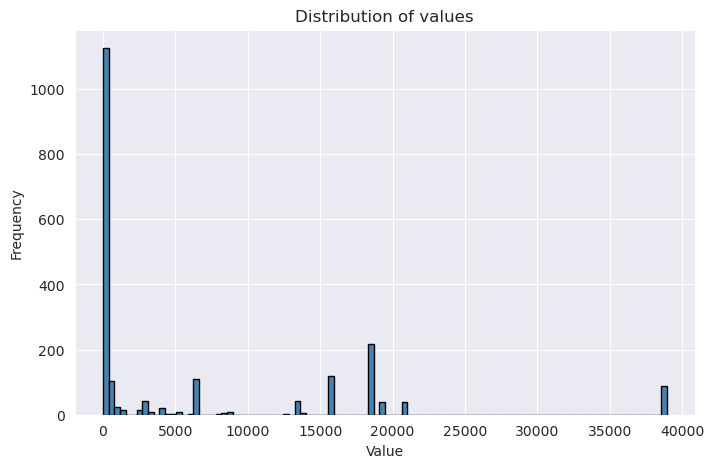

In [52]:
data = np.array(liste)  # paste your full list here

# Basic histogram
plt.figure(figsize=(8, 5))
plt.hist(data, bins=100, color='steelblue', edgecolor='black')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of values")
plt.show()

In [3]:
rows = []

for q in range(5, 100, 5):
    filename = f'results_document_compared/thresholds_Percentile_{q}.csv'
    df = pd.read_csv(filename)

    # Select the row of interest
    row = df[df.iloc[:, 0] == "token-token-token-level-low/lexical_frequency"]

    if not row.empty:
        row = row.copy()
        row["q"] = q  # add percentile info
        rows.append(row)

# Concatenate all results
final_df = pd.concat(rows, ignore_index=True)

# Move 'q' to the first column
cols = ["q"] + [c for c in final_df.columns if c != "q"]
final_df = final_df[cols]

# Save to new CSV
final_df.to_csv("./results/lexical_frequency_thresholds.csv", index=False)


In [4]:
final_df

,q,Unnamed: 0,N1,N2,N3,N4
0,5,token-token-token-level-low/lexical_frequency,9.7885,6.080,3.24,6.220
1,10,token-token-token-level-low/lexical_frequency,23.4500,16.280,13.65,19.433
2,15,token-token-token-level-low/lexical_frequency,47.0900,36.446,26.69,43.720
3,20,token-token-token-level-low/lexical_frequency,64.0500,68.240,50.61,69.530
4,25,token-token-token-level-low/lexical_frequency,109.6125,101.150,95.00,96.010
5,30,token-token-token-level-low/lexical_frequency,179.3900,179.390,180.88,176.760
6,35,token-token-token-level-low/lexical_frequency,353.4500,328.450,324.80,266.620
7,40,token-token-token-level-low/lexical_frequency,440.7400,627.570,620.07,460.148
8,45,token-token-token-level-low/lexical_frequency,1541.9600,1398.850,1341.76,853.310
9,50,token-token-token-level-low/lexical_frequency,4000.4100,4838.380,4225.14,2958.580


In [5]:
out_path = os.path.abspath("results_document_compared/lexical_frequency_thresholds.csv")
print("Saving to:", out_path)
final_df.to_csv(out_path, index=False)

Saving to: /home/waissa/recherche/thresholds/results/lexical_frequency_thresholds.csv


In [74]:
for q in range (5, 100, 5):
    print(q)
    plot_thresholds_table(f'results_document_compared/thresholds_Percentile_{q}.json')

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
